# High Harmonic Generation Dipole Moment in Hydrogen-like Potential

## Theory

### Lewenstein Model for HHG

According to the Lewenstein model [1], we can calculate the dipole moment as
$$\vec{x}(t_r) \simeq 2\mathbb{R}\left\{\int_{t_i}^{t_r} \mathrm{d}t\, 
\vec{d}^\ast\left(\vec{p}_\text{st} + \vec{A}(t_r)\right)
e^{-iS(\vec{p}_\text{st}, t_r, t_i)}
\left[\vec{E}(t_i)\cdot\vec{d}\left(\vec{p}_{st}+\vec{A}(t_i)\right)\right]\right\}.$$

The transition dipole matrix elements can be calculated using
$$\vec{d}(\psi_f, \psi_i) = \langle\psi_f|\vec{r}|\psi_i\rangle.$$

Under the strong-field approximation, we replace the final state as that of a plane wave with asymptotic momentum $\vec{p}$, yielding
$$\begin{matrix}
\vec{d}(\vec{p}) & \simeq & \int \mathrm{d}\vec{r}\, e^{-i\vec{p}\cdot\vec{r}}\vec{r}\psi_0(\vec{r})\\
& = & i\nabla\tilde{\psi_0}(\vec{p})
\end{matrix}.$$
Thus we can approximate the transition dipole matrix elements using the gradient of the ground-state orbital in momentum space.

### Hydrogen-like Orbitals

The momentum distribution of a hydrogen-like orbital in spherical co-ordinates is given as [2]
$$
\varUpsilon_{nlm}\left(p, \theta,\phi\right) = 
\frac{\pi 2^{2l+4} l!}{\left(2\pi\gamma\right)^{3/2}}
\sqrt{\frac{n(n-l-1)!}{(n+l)!}}
\frac{\zeta^l}{(\zeta^2+1)^{l+2}} C_{n-l-1}^{l+1}\left(\frac{\zeta^2-1}{\zeta^2+1}\right)Z_l^m(\theta, \phi),
$$
whereby I have used the real forms of the spherical harmonics:

$$
Z_n^m(\theta, \phi) = 
\begin{cases}
    \frac{1}{\sqrt{2}} \left[Y_n^m(\theta, \phi) + \overline{Y_n^m}(\theta, \phi)\right] & \text{if } m>0\\
    Y_n^m(\theta, \phi) & \text{if } m=0\\
    \frac{1}{i\sqrt{2}}\left[Y_n^m(\theta, \phi) - \overline{Y_n^m}(\theta, \phi)\right] & \text{if } m<0
\end{cases}
$$

with $\overline{Y}$ denoted complex conjugate.

For s-orbitals, $l=m=0$ and for p-orbitals, $l=1$ and $m=\{-1, 0, 1\}$. For the real orbitals defined above, $m=1$ results in the $np_x$ orbital, $m=-1$ gives the $np_y$ orbital and $m=0$ gives the $np_z$ orbital whereby the subscript is the "axis of revolution" of the radial function.

### HHG Source

The dipole moment can either be found by integrating the temporal integral in the Lewenstein formula, or via stationary phase analysis. In either case, the transition dipole matrix element needs to be evaluated at the time of ionization, $t_i$, and at the time of recombination, $t_r$. For any pair of times, $(t_i, t_r)$, one can evaluate the stationary momentum, $\vec{p}_\text{st}$. Thus we need to calculate the following part of the integrand in the Lewenstein model, the orbital-resolved HHG source term,

$$
\vec{S} = \vec{d}_r \left[\vec{E}_i \cdot \vec{d}_i\right]
$$
where $i,r$ represent the value at ionization or recombination respectively.

Additionally, if we choose our co-ordinate axes such that $\hat{z} = \hat{k}$, i.e. $z$ is aligned with the electric field's wave vector, then the electron's trajectory is isolated to the x-y plane (must start and end at the origin). 

## Degenerate states

In the case of degenerate valance orbitals, one needs to calculate the dipole moment for each orbital individually. Since HHG is dominated by the process in which the electron ionizes and recombines from/to the same orbital, phase of the ground state orbital cancels out and the process is coherent. Therefore the dipole moment from each degenerate orbital are coherent from each other. Since the integral is a linear operator, one can calculate the coherent sum of all HHG source terms before performing the integral. Note that this is not the same as performing a coherent sum over transition dipole matrix elements -- it is the full process of ionization and recombination that is coherent and therefore permits a coherent sum over all pathways.

1. M. Lewenstein et al., Theory of high-harmonic generation by low-frequency laser fields. Phys. Rev. A. 49, 2117–2132 (1994).
1. B. Podolsky, L. Pauling, The momentum distribution in hydrogen-like atoms. Phys. Rev. 34, 109–116 (1929).


## Import packages

In [131]:
# Import sympy package
import sympy as sp

# Import math & numpy packages
import math as mth
import numpy as np

# Ensure output displayed as LaTeX
sp.init_printing(use_latex=True)

## Define symbols
* $E_i$ is the electric field at time of ionization.
* $\vec{p}_s = -\int_{t_i}^{t_r} \vec{A}(t^\prime)/(t_r-t_i)\,\text{d}t^\prime$ is the stationary momentum governed by the electric field only (i.e. independent of the atom)
* $\vec{p}_i = \vec{p}_s + \vec{A}(t_i)$ is the electron momentum at time of ionization (determined by the electric field & independent of the atom).
* $\vec{p}_r = \vec{p}_s + A(t_r)$ is the electron momentum at time of recombination (determined by the electric field & independent of the atom).
* $\phi_i$ is the angle made by the electron momemtum upon ionization wrt the quantization axes.
* $\phi_r$ is the angle made by the electron mometum upon recombination wrt the electron momentum upon ionization, i.e. $\phi_r$.
* $\alpha$ is the angle made by the electric field at ionization wrt the electron momentum upon ionization.
* $\tau = \omega t_i$ is the phase of the electric field at the time of ionization.
* $n,l,m$ are the quantum numbers
* $p, \theta, \phi$ are spherical coordinates in momentum space:
 * $p \geq 0$ is the radial component.
 * $0 \leq \theta \leq \pi$ is the polar angle wrt the z-axis.
 * $0 \leq \phi < 2\pi$ is the azimuthal angle wrt the x-axis pointing in the direction of the y-axis (right-hand rule).
* $\gamma = \sqrt{2I_p} = \frac{Z}{n}$ is determined by the ionization potential $I_p$ or defined by the atomic mass divided by the quantum number, $n$.
* $\zeta = p/\gamma$, where $p$ is the radial component of the momentum $\vec{p}$.

In [132]:
# Generic symbols
l, m = sp.symbols("l m", real=True)
alpha, theta, phi, phi_i, phi_r, alpha, varepsilon = sp.symbols(
    "alpha theta phi phi_i phi_r alpha varepsilon", real=True
)
n, gamma, E_i = sp.symbols("n gamma E_i", real=True, positive=True)
p, p_i, p_r, p_x, p_y, p_z = sp.symbols(
    "p p_i p_r p_x p_y p_z", real=True, positive=True
)
PI = sp.pi
zeta = p / gamma

# Use real spherical harmonics (or not)
REAL = True

# Define polarization in x-y plane
THETA = PI / 2

# Shorthand for trig expressions
sin_theta = sp.sin(theta)
cos_theta = sp.cos(theta)
sin_phi = sp.sin(phi)
cos_phi = sp.cos(phi)

## Define rotation matrices

### Vector rotation matrix spherical --> Cartesian
$$
\begin{bmatrix}
\mathbf{\hat{x}}\\ 
\mathbf{\hat{y}}\\ 
\mathbf{\hat{z}}
\end{bmatrix}
 = \begin{bmatrix}
\sin\theta\cos\phi & \cos\theta\cos\phi & -\sin\phi\\
\sin\theta\sin\phi & \cos\theta\sin\phi & \cos\phi\\
\cos\theta & -\sin\theta & 0
\end{bmatrix}
= \texttt{R}(\theta, \phi)\begin{bmatrix}
\mathbf{\hat{p}}\\ 
\mathbf{\hat{\theta}}\\ 
\mathbf{\hat{\phi}}
\end{bmatrix}
$$

In [133]:
spherical_to_cartesian_matrix = sp.Matrix(
    [
        [sin_theta * cos_phi, cos_theta * cos_phi, -sin_phi],
        [sin_theta * sin_phi, cos_theta * sin_phi, cos_phi],
        [cos_theta, -sin_theta, 0],
    ]
)

### Rotation matrices
$$
\texttt{R}_x(\theta) =
\begin{bmatrix}
1 & 0 & 0\\
0 & \cos\theta & -\sin\theta\\
0 & \sin\theta & \cos\theta
\end{bmatrix}
\\
\texttt{R}_y(\theta) =
\begin{bmatrix}
\cos\theta & 0 & \sin\theta\\
0 & 1 & 0\\
-\sin\theta & 0 & \cos\theta\\
\end{bmatrix}
\\
\texttt{R}_z(\phi) =
\begin{bmatrix}
\cos\phi & -\sin\phi & 0\\
\sin\phi & \cos\phi & 0\\
0 & 0 & 1
\end{bmatrix}\;
$$

In [134]:
display("R_x, R_y, R_z = ")
display(Rx := sp.Matrix([[1, 0, 0], [0, cos_theta, -sin_theta], [0, sin_theta, cos_theta]]))
display(Ry := sp.Matrix([[cos_theta, 0, sin_theta], [0, 1, 0], [-sin_theta, 0, cos_theta]]))
display(Rz := sp.Matrix([[cos_phi, -sin_phi, 0], [sin_phi, cos_phi, 0], [0, 0, 1]]))

'R_x, R_y, R_z = '

⎡1    0        0   ⎤
⎢                  ⎥
⎢0  cos(θ)  -sin(θ)⎥
⎢                  ⎥
⎣0  sin(θ)  cos(θ) ⎦

⎡cos(θ)   0  sin(θ)⎤
⎢                  ⎥
⎢   0     1    0   ⎥
⎢                  ⎥
⎣-sin(θ)  0  cos(θ)⎦

⎡cos(φ)  -sin(φ)  0⎤
⎢                  ⎥
⎢sin(φ)  cos(φ)   0⎥
⎢                  ⎥
⎣  0        0     1⎦

### Convert from spherical to Cartesian co-ordinates
$$
p_x = p \sin\theta \cos\phi \\
p_y = p \sin\theta \sin\phi \\
p_z = p \cos\theta
$$

### Substitute values for spherical coordinates

In [135]:
def vector_subst(expr, P, th, ph):
    return sp.trigsimp(expr.subs([(p, P), (theta, th), (phi, ph)]))

### Simplification of vector

In [136]:
def vector_operation(V, *args):
    v_out = []
    for v in V:
        for op in args:
            v = op(v)
        v_out.append(v)
    return sp.Matrix(v_out)


def vector_factor(V):
    return vector_operation(V, sp.factor, sp.trigsimp)
    # return sp.Matrix([sp.factor(V[i]).trigsimp() for i in range(3)])


def vector_collect(V, *args):
    return vector_operation(V, lambda x: sp.collect(x, args))


def vector_simplify(V):
    return vector_operation(
        V,
        sp.expand_trig,
        lambda x: sp.collect(x, (gamma, p_r, p_i)),
        sp.trigsimp,
        sp.simplify,
    )

## Define electric 
Electric field is defined in the x-y plane
$$
E 
= \begin{bmatrix}E_x\\E_y\\0\end{bmatrix}
= \frac{E_0}{\sqrt{1+\varepsilon^2}} \begin{bmatrix}\cos(\omega t)\\\varepsilon\sin(\omega t)\\0\end{bmatrix}
= E_0^\prime \begin{bmatrix}\cos(\tau)\\\varepsilon\sin(\tau)\\0\end{bmatrix}
$$

where $\tau = \omega t_i$

However, the electric field only enters the Lewenstein model at the time of ionisation. We can then define this field as
$$
\vec{E}_i = E_i 
\begin{bmatrix}
    \cos(\alpha + \phi_i)\\
    \sin(\alpha + \phi_i)\\
    0
\end{bmatrix}
$$

In [137]:
display("E = ", E := E_i*sp.Matrix([sp.cos(alpha + phi_i), sp.sin(alpha + phi_i), 0]))

'E = '

⎡Eᵢ⋅cos(α + φᵢ)⎤
⎢              ⎥
⎢Eᵢ⋅sin(α + φᵢ)⎥
⎢              ⎥
⎣      0       ⎦

# Hydrogen-like orbitals

## Definitions

### Redefine spherical harmonics
Name of function is unintuitive and requires additional angle arguments, so I redefine and simplify the calling convention

In [138]:
# Redefine real spherical harmonics
def Zlm(l, m):
    return sp.Znm(l, m, theta, phi)
Zlm(l, m)

In [139]:
# Redefine complex spherical harmonics
def Ylm(l, m):
    return sp.Ynm(l, m, theta, phi)
Ylm(l,m)

### Define hydrogen-like orbitals in momentum space
$$
\varUpsilon_{nlm}\left(p, \theta,\phi\right) = 
\frac{\pi 2^{2l+4} l!}{\left(2\pi\gamma\right)^{3/2}}
\sqrt{\frac{n(n-l-1)!}{(n+l)!}}
\frac{\zeta^l}{(\zeta^2+1)^{l+2}} C_{n-l-1}^{l+1}\left(\frac{\zeta^2-1}{\zeta^2+1}\right)Z_l^m(\theta, \phi)
$$

'upsilon(n,l,m) = '

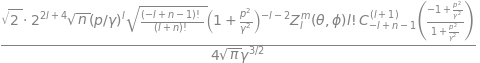

In [140]:
def wavefunction(n, l, m):
    zeta2 = zeta**2
    A = PI * 2**(2*l+4) * sp.factorial(l) / (2*PI*gamma)**sp.Rational(3,2)
    B = sp.sqrt(n*sp.factorial(n-l-1)/sp.factorial(n+l))
    C = (zeta**l/(zeta2+1)**(l+2)) * sp.gegenbauer(n-l-1, l+1, (zeta2-1)/(zeta2+1))
    if REAL:
        U = Zlm(l, m)
    else:
        U = Ylm(l, m)       
    return U * A * B * C

display("upsilon(n,l,m) = ", wavefunction(n, l, m))

### Define dipole transition matrix element
Vector is in spherical coordinates with $\hat{p}=\frac{\vec{p}}{\left| \vec{p} \right|}$ in the direction of the momentum.
$$
\vec{d}_p(\vec{p}) = 
i\begin{bmatrix}
\partial_p \varUpsilon(p, \theta, \phi)\\
(1/p)\partial_\theta \varUpsilon(p, \theta, \phi)\\
(1/p\sin\theta)\partial_\phi \varUpsilon(p, \theta, \phi)\\
\end{bmatrix}
$$

In [141]:
def transition_dipole_spherical(upsilon):
    dp = sp.simplify(sp.diff(upsilon, p))
    dtheta = sp.simplify(sp.diff(upsilon, theta)/p)
    dphi = sp.simplify(sp.diff(upsilon, phi)/(p*sp.sin(theta)))
    expr = sp.Matrix([e.factor().collect(p) for e in [dp, dtheta, dphi]])
    return sp.I*expr

In [142]:
# Set theta = pi/2 for polarization in x-y plane
# Substitute p_x = p*cos(phi), p_y = p*sin(phi)
# Return Cartesian components as a function of p, p_x, p_y, gamma
def spherical_to_cartesian(spherical_vector):
    expr = (spherical_to_cartesian_matrix*spherical_vector).subs(theta, THETA)
    expr = expr.subs([(cos_phi, p_x/p), (sin_phi, p_y/p)])
    expr = sp.Matrix([expr[n].factor().collect((p_x, p_y, p, gamma)) for n in range(3)])
    return expr

### Define dipole moment
Vector is in spherical coordinates with $\hat{p} = \vec{p}_r/\left|\vec{p}_r\right|$ in the direction of the momentum at time of recombination, since $\vec{E}.{d}$ is a scalar,
$$
\vec{x} \propto 
i\int_{-\infty}^{t_r} \vec{d}_p^\ast(\vec{p}_r) e^{-iS}\left[\vec{E}_i\cdot\vec{d}_p(\vec{p}_i)\right] \, \text{d}t_i + \text{c.c.}
$$

<!--
$$\vec{\widetilde{d}_p}(x, y, z) = \texttt{R}_z\left(-\phi_i-\phi_r\right)\texttt{R} \left(\pi/2, \phi_i+\phi_r\right) \vec{d}_p\left(p, \pi/2, \phi_i+\phi_r\right)$$
-->

The dipole moment is defined relative to the momentum vector at time of recombination, not to the quantization axes which are arbitrary. We however want to find the dipole moment wrt our lab-frame co-ordinate system, which is defined by the electric field:
1. Define dipole moment in vector spherical coordinates
1. Rotate ionisation transition dipole matrix to Cartesian coordinates
   * $p_\text{st}$ has radial magnitude $p_i$ at angle $\phi_i$ wrt $\hat{x}$.
1. Dot with electric field at $\tau$ in Cartesian co-ordinates (scalar)
1. Define recombination transition dipole matrix
   * $p_\text{st}$ has radial magnitude $p_r$ at angle $\phi_i + \phi_r$ wrt $\hat{x}$.
1. Multiply together to yield net dipole moment in spherical co-ordinates


As the ellipticity changes, so will the values of $\alpha$ and $\phi_r$, as well as $E_i$, $p_i$ and $p_r$.

In [143]:
def hhg_source_spherical(upsilon, E):
    # Dipole transition matrix element in vector spherical coordinates
    d = transition_dipole_spherical(upsilon)
    
    # Ionisation dipole transition matrix element in Cartesian coordinates
    di = vector_subst(spherical_to_cartesian_matrix * d, p_i, THETA, phi_i)
    
    # Net ionisation rate
    dI = E.T*di
    
    # Recombination dipole transition matrix element in spherical coordinates
    drs = vector_subst(d, p_r, THETA, phi_i+phi_r).conjugate()

    # display(d, di, dI, drs)
    
    # Return dipole moment
    return vector_factor(drs*dI)

Convert dipole to Cartesian co-ordinates (using $\hat{p} = \vec{p}_r/\left|\vec{p}_r\right|$)

In [144]:
def hhg_source_cartesian(spherical_dipole_moment):
    return vector_simplify(vector_subst(
        spherical_to_cartesian_matrix * spherical_dipole_moment,
        p_r,
        THETA,
        phi_i + phi_r,
    ))

## Transition dipole matrix elements for hydrogen-like orbitals

### Hydrogen-like 1s (hydrogen)

'U1s = '

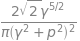

In [145]:
# Momentum distribution
display("U1s = ", U1s := sp.expand_func(wavefunction(1,0,0)).simplify())

In [146]:
# Transition dipole matrix elements (spherical coordinates)
transition_dipole_spherical(U1s)

⎡         5/2   ⎤
⎢-8⋅√2⋅ⅈ⋅γ   ⋅p ⎥
⎢───────────────⎥
⎢            3  ⎥
⎢   ⎛ 2    2⎞   ⎥
⎢ π⋅⎝γ  + p ⎠   ⎥
⎢               ⎥
⎢       0       ⎥
⎢               ⎥
⎣       0       ⎦

In [147]:
# Transition dipole matrix elements (Cartesian co-ordinates)
spherical_to_cartesian(_)

⎡         5/2     ⎤
⎢-8⋅√2⋅ⅈ⋅γ   ⋅pₓ  ⎥
⎢──────────────── ⎥
⎢             3   ⎥
⎢    ⎛ 2    2⎞    ⎥
⎢  π⋅⎝γ  + p ⎠    ⎥
⎢                 ⎥
⎢         5/2     ⎥
⎢-8⋅√2⋅ⅈ⋅γ   ⋅p_y ⎥
⎢─────────────────⎥
⎢             3   ⎥
⎢    ⎛ 2    2⎞    ⎥
⎢  π⋅⎝γ  + p ⎠    ⎥
⎢                 ⎥
⎣        0        ⎦

### Hydrogen-like 2p (neon)

'U2p_x, U2p_y, U2p_z = '

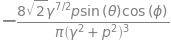

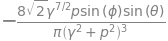

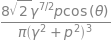

In [148]:
# Momentum distribution
display(
    "U2p_x, U2p_y, U2p_z = ",
    U2px := sp.expand_func(wavefunction(2, 1, 1)).simplify(),
    U2py := sp.expand_func(wavefunction(2, 1, -1)).simplify(),
    U2pz := sp.expand_func(wavefunction(2, 1, 0)).simplify(),
)

In [166]:
# Dipole matrix transition elements (spherical coordinates)
display("Spherical transition dipole matrix elements: [d(2p_x), d(2p_y), d(2p_z)] = ")
[(transition_dipole_spherical(u)).subs(theta, THETA) for u in [U2px, U2py, U2pz]]

'Spherical transition dipole matrix elements: [d(2p_x), d(2p_y), d(2p_z)] = '

⎡⎡        7/2 ⎛   2      2⎞       ⎤  ⎡        7/2 ⎛   2      2⎞       ⎤        ↪
⎢⎢8⋅√2⋅ⅈ⋅γ   ⋅⎝- γ  + 5⋅p ⎠⋅cos(φ)⎥  ⎢8⋅√2⋅ⅈ⋅γ   ⋅⎝- γ  + 5⋅p ⎠⋅sin(φ)⎥        ↪
⎢⎢────────────────────────────────⎥  ⎢────────────────────────────────⎥  ⎡     ↪
⎢⎢                     4          ⎥  ⎢                     4          ⎥  ⎢     ↪
⎢⎢            ⎛ 2    2⎞           ⎥  ⎢            ⎛ 2    2⎞           ⎥  ⎢     ↪
⎢⎢          π⋅⎝γ  + p ⎠           ⎥  ⎢          π⋅⎝γ  + p ⎠           ⎥  ⎢-8⋅√ ↪
⎢⎢                                ⎥  ⎢                                ⎥  ⎢──── ↪
⎢⎢               0                ⎥, ⎢               0                ⎥, ⎢     ↪
⎢⎢                                ⎥  ⎢                                ⎥  ⎢  ⎛  ↪
⎢⎢               7/2              ⎥  ⎢               7/2              ⎥  ⎢π⋅⎝γ ↪
⎢⎢       8⋅√2⋅ⅈ⋅γ   ⋅sin(φ)       ⎥  ⎢      -8⋅√2⋅ⅈ⋅γ   ⋅cos(φ)       ⎥  ⎢     ↪
⎢⎢       ──────────────────       ⎥  ⎢      ────────────────────      ⎥  ⎣     ↪
⎢⎢                     3    

In [170]:
# Dipole matrix transition elements (Cartesian co-ordinates)
display(
    "Cartesian transition dipole matrix elements: [d(2p_x), d(2p_y), d(2p_z)] = ",
    [
        sp.Matrix(
            [
                v.subs(
                    [
                        (
                            (p_y**2, p**2 - p_x**2)
                            if n == 0 and m == 0
                            else (
                                (p_x**2, p**2 - p_y**2) if n == 1 and m == 1 else (0, 0)
                            )
                        )
                    ]
                )
                .expand()
                .factor()
                for n, v in enumerate(spherical_to_cartesian(d))
            ]
        )
        for m, d in enumerate(_)
    ],
)

'Cartesian transition dipole matrix elements: [d(2p_x), d(2p_y), d(2p_z)] = '

⎡⎡         7/2 ⎛ 2    2       2⎞ ⎤  ⎡               7/2              ⎤         ↪
⎢⎢-8⋅√2⋅ⅈ⋅γ   ⋅⎝γ  + p  - 6⋅pₓ ⎠ ⎥  ⎢      48⋅√2⋅ⅈ⋅γ   ⋅pₓ⋅p_y       ⎥         ↪
⎢⎢───────────────────────────────⎥  ⎢      ───────────────────       ⎥  ⎡      ↪
⎢⎢                    4          ⎥  ⎢                    4           ⎥  ⎢      ↪
⎢⎢           ⎛ 2    2⎞           ⎥  ⎢           ⎛ 2    2⎞            ⎥  ⎢      ↪
⎢⎢         π⋅⎝γ  + p ⎠           ⎥  ⎢         π⋅⎝γ  + p ⎠            ⎥  ⎢      ↪
⎢⎢                               ⎥  ⎢                                ⎥  ⎢      ↪
⎢⎢               7/2             ⎥, ⎢         7/2 ⎛ 2    2        2⎞ ⎥, ⎢8⋅√2⋅ ↪
⎢⎢      48⋅√2⋅ⅈ⋅γ   ⋅pₓ⋅p_y      ⎥  ⎢-8⋅√2⋅ⅈ⋅γ   ⋅⎝γ  + p  - 6⋅p_y ⎠ ⎥  ⎢───── ↪
⎢⎢      ───────────────────      ⎥  ⎢────────────────────────────────⎥  ⎢      ↪
⎢⎢                    4          ⎥  ⎢                     4          ⎥  ⎢  ⎛ 2 ↪
⎢⎢           ⎛ 2    2⎞           ⎥  ⎢            ⎛ 2    2⎞           ⎥  ⎣π⋅⎝γ  ↪
⎢⎢         π⋅⎝γ  + p ⎠      

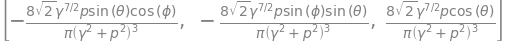

In [32]:
[U2px, U2py, U2pz]

In [41]:
vector_operation(spherical_to_cartesian_matrix * transition_dipole_spherical(U2px), sp.expand_trig, sp.trigsimp)

⎡        7/2 ⎛   2      2    2       2         2    2       2⎞⎤
⎢8⋅√2⋅ⅈ⋅γ   ⋅⎝- γ  - 6⋅p ⋅sin (φ)⋅sin (θ) + 6⋅p ⋅sin (θ) - p ⎠⎥
⎢─────────────────────────────────────────────────────────────⎥
⎢                                   4                         ⎥
⎢                          ⎛ 2    2⎞                          ⎥
⎢                        π⋅⎝γ  + p ⎠                          ⎥
⎢                                                             ⎥
⎢                     7/2  2           2                      ⎥
⎢            48⋅√2⋅ⅈ⋅γ   ⋅p ⋅sin(φ)⋅sin (θ)⋅cos(φ)            ⎥
⎢            ─────────────────────────────────────            ⎥
⎢                                   4                         ⎥
⎢                          ⎛ 2    2⎞                          ⎥
⎢                        π⋅⎝γ  + p ⎠                          ⎥
⎢                                                             ⎥
⎢                7/2  2                                       ⎥
⎢       12⋅√2⋅ⅈ⋅γ   ⋅p ⋅(-sin(φ - 2⋅θ) +

In [24]:
[transition_dipole_spherical(u) for u in [U2px, U2py, U2pz]]

⎡⎡        7/2 ⎛   2      2⎞              ⎤  ⎡        7/2 ⎛   2      2⎞         ↪
⎢⎢8⋅√2⋅ⅈ⋅γ   ⋅⎝- γ  + 5⋅p ⎠⋅sin(θ)⋅cos(φ)⎥  ⎢8⋅√2⋅ⅈ⋅γ   ⋅⎝- γ  + 5⋅p ⎠⋅sin(φ)⋅ ↪
⎢⎢───────────────────────────────────────⎥  ⎢───────────────────────────────── ↪
⎢⎢                        4              ⎥  ⎢                        4         ↪
⎢⎢               ⎛ 2    2⎞               ⎥  ⎢               ⎛ 2    2⎞          ↪
⎢⎢             π⋅⎝γ  + p ⎠               ⎥  ⎢             π⋅⎝γ  + p ⎠          ↪
⎢⎢                                       ⎥  ⎢                                  ↪
⎢⎢               7/2                     ⎥  ⎢               7/2                ↪
⎢⎢      -8⋅√2⋅ⅈ⋅γ   ⋅cos(φ)⋅cos(θ)       ⎥  ⎢      -8⋅√2⋅ⅈ⋅γ   ⋅sin(φ)⋅cos(θ)  ↪
⎢⎢      ───────────────────────────      ⎥  ⎢      ─────────────────────────── ↪
⎢⎢                        3              ⎥, ⎢                        3         ↪
⎢⎢               ⎛ 2    2⎞               ⎥  ⎢               ⎛ 2    2⎞          ↪
⎢⎢             π⋅⎝γ  + p ⎠  

In [35]:
[spherical_to_cartesian_matrix * transition_dipole_spherical(u) for u in [U2px, U2py, U2pz]]

⎡⎡                 7/2 ⎛   2      2⎞    2       2              7/2    2        ↪
⎢⎢         8⋅√2⋅ⅈ⋅γ   ⋅⎝- γ  + 5⋅p ⎠⋅sin (θ)⋅cos (φ)   8⋅√2⋅ⅈ⋅γ   ⋅sin (φ)   8 ↪
⎢⎢         ───────────────────────────────────────── - ─────────────────── - ─ ↪
⎢⎢                                  4                                3         ↪
⎢⎢                         ⎛ 2    2⎞                        ⎛ 2    2⎞          ↪
⎢⎢                       π⋅⎝γ  + p ⎠                      π⋅⎝γ  + p ⎠          ↪
⎢⎢                                                                             ↪
⎢⎢        7/2 ⎛   2      2⎞           2                     7/2                ↪
⎢⎢8⋅√2⋅ⅈ⋅γ   ⋅⎝- γ  + 5⋅p ⎠⋅sin(φ)⋅sin (θ)⋅cos(φ)   8⋅√2⋅ⅈ⋅γ   ⋅sin(φ)⋅cos(φ)⋅ ↪
⎢⎢─────────────────────────────────────────────── - ────────────────────────── ↪
⎢⎢                            4                                          3     ↪
⎢⎢                   ⎛ 2    2⎞                                  ⎛ 2    2⎞      ↪
⎢⎢                 π⋅⎝γ  + p

In [39]:
[vector_operation(spherical_to_cartesian_matrix * transition_dipole_spherical(u), sp.expand_trig, sp.trigsimp) for u in [U2px, U2py, U2pz]]

⎡⎡        7/2 ⎛   2      2    2       2         2    2       2⎞⎤  ⎡            ↪
⎢⎢8⋅√2⋅ⅈ⋅γ   ⋅⎝- γ  - 6⋅p ⋅sin (φ)⋅sin (θ) + 6⋅p ⋅sin (θ) - p ⎠⎥  ⎢    48⋅√2⋅ⅈ ↪
⎢⎢─────────────────────────────────────────────────────────────⎥  ⎢    ─────── ↪
⎢⎢                                   4                         ⎥  ⎢            ↪
⎢⎢                          ⎛ 2    2⎞                          ⎥  ⎢            ↪
⎢⎢                        π⋅⎝γ  + p ⎠                          ⎥  ⎢            ↪
⎢⎢                                                             ⎥  ⎢            ↪
⎢⎢                     7/2  2           2                      ⎥  ⎢        7/2 ↪
⎢⎢            48⋅√2⋅ⅈ⋅γ   ⋅p ⋅sin(φ)⋅sin (θ)⋅cos(φ)            ⎥  ⎢8⋅√2⋅ⅈ⋅γ    ↪
⎢⎢            ─────────────────────────────────────            ⎥  ⎢─────────── ↪
⎢⎢                                   4                         ⎥, ⎢            ↪
⎢⎢                          ⎛ 2    2⎞                          ⎥  ⎢            ↪
⎢⎢                        π⋅

In [56]:
vector_operation(spherical_to_cartesian_matrix * transition_dipole_spherical(U2px), sp.expand_trig, sp.trigsimp)

⎡        7/2 ⎛   2      2    2       2         2    2       2⎞⎤
⎢8⋅√2⋅ⅈ⋅γ   ⋅⎝- γ  - 6⋅p ⋅sin (φ)⋅sin (θ) + 6⋅p ⋅sin (θ) - p ⎠⎥
⎢─────────────────────────────────────────────────────────────⎥
⎢                                   4                         ⎥
⎢                          ⎛ 2    2⎞                          ⎥
⎢                        π⋅⎝γ  + p ⎠                          ⎥
⎢                                                             ⎥
⎢                     7/2  2           2                      ⎥
⎢            48⋅√2⋅ⅈ⋅γ   ⋅p ⋅sin(φ)⋅sin (θ)⋅cos(φ)            ⎥
⎢            ─────────────────────────────────────            ⎥
⎢                                   4                         ⎥
⎢                          ⎛ 2    2⎞                          ⎥
⎢                        π⋅⎝γ  + p ⎠                          ⎥
⎢                                                             ⎥
⎢                7/2  2                                       ⎥
⎢       12⋅√2⋅ⅈ⋅γ   ⋅p ⋅(-sin(φ - 2⋅θ) +

In [97]:
D = sp.Matrix([sp.collect(v.subs([
        (cos_phi, p_x/(p*sin_theta)),
        (sin_phi, p_y/(p*sin_theta)),
        (sin_theta, sp.sqrt(1-cos_theta**2)), 
        (sin_theta*cos_phi, p_x/p), 
        (sin_theta*sin_phi, p_y/p), 
        (cos_theta, p_z/p),
    ]), (8*sp.sqrt(2)*sp.I*gamma**sp.Rational(7,2))) for v in spherical_to_cartesian_matrix * transition_dipole_spherical(U2px)])
D

⎡             ⎛  2 ⎛   2      2⎞                 2                         2   ↪
⎢         7/2 ⎜pₓ ⋅⎝- γ  + 5⋅p ⎠              p_y                        pₓ ⋅p ↪
⎢ 8⋅√2⋅ⅈ⋅γ   ⋅⎜───────────────── - ────────────────────────── - ────────────── ↪
⎢             ⎜               4         ⎛       2⎞          3        ⎛       2 ↪
⎢             ⎜    2 ⎛ 2    2⎞        2 ⎜    p_z ⎟ ⎛ 2    2⎞       4 ⎜    p_z  ↪
⎢             ⎜ π⋅p ⋅⎝γ  + p ⎠     π⋅p ⋅⎜1 - ────⎟⋅⎝γ  + p ⎠    π⋅p ⋅⎜1 - ──── ↪
⎢             ⎜                         ⎜      2 ⎟                   ⎜      2  ↪
⎢             ⎝                         ⎝     p  ⎠                   ⎝     p   ↪
⎢                                                                              ↪
⎢            ⎛       ⎛   2      2⎞                                             ↪
⎢        7/2 ⎜pₓ⋅p_y⋅⎝- γ  + 5⋅p ⎠             pₓ⋅p_y                    pₓ⋅p_ ↪
⎢8⋅√2⋅ⅈ⋅γ   ⋅⎜──────────────────── + ────────────────────────── - ──────────── ↪
⎢            ⎜              

In [130]:
sp.Matrix([v.subs(p_z,p_z) for v in 
    [
        D[0, 0].subs([(p_z**2, p**2 - p_x**2 - p_y**2)]).simplify().factor(),
        D[1, 0].simplify().factor(),
        D[2, 0].simplify().factor(),
    ]]
)

⎡         7/2 ⎛ 2    2       2⎞ ⎤
⎢-8⋅√2⋅ⅈ⋅γ   ⋅⎝γ  + p  - 6⋅pₓ ⎠ ⎥
⎢───────────────────────────────⎥
⎢                    4          ⎥
⎢           ⎛ 2    2⎞           ⎥
⎢         π⋅⎝γ  + p ⎠           ⎥
⎢                               ⎥
⎢               7/2             ⎥
⎢      48⋅√2⋅ⅈ⋅γ   ⋅pₓ⋅p_y      ⎥
⎢      ───────────────────      ⎥
⎢                    4          ⎥
⎢           ⎛ 2    2⎞           ⎥
⎢         π⋅⎝γ  + p ⎠           ⎥
⎢                               ⎥
⎢               7/2             ⎥
⎢      48⋅√2⋅ⅈ⋅γ   ⋅pₓ⋅p_z      ⎥
⎢      ───────────────────      ⎥
⎢                    4          ⎥
⎢           ⎛ 2    2⎞           ⎥
⎣         π⋅⎝γ  + p ⎠           ⎦

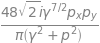

In [109]:
(D[1,0].subs([(p_z**2,p**2-p_x**2-p_y**2)])*(gamma**2+p**2)**3).simplify()/(gamma**2+p**2)**4

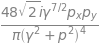

In [118]:
D[1,0].simplify().factor()

In [43]:
# Transition dipole matrix elements (spherical coordinates)
display("Spherical transition dipole matrix elements: [d(2p_x), d(2p_y), d(2p_z)] = ")
[(spherical_to_cartesian_matrix*transition_dipole_spherical(u)).subs([(sin_theta*cos_phi, p_x/p), (sin_theta*sin_phi, p_y/p), (cos_theta, p_z/p)]) for u in [U2px, U2py, U2pz]]

'Spherical transition dipole matrix elements: [d(2p_x), d(2p_y), d(2p_z)] = '

⎡⎡                7/2    2              7/2   2 ⎛   2      2⎞           7/2    ↪
⎢⎢        8⋅√2⋅ⅈ⋅γ   ⋅sin (φ)   8⋅√2⋅ⅈ⋅γ   ⋅pₓ ⋅⎝- γ  + 5⋅p ⎠   8⋅√2⋅ⅈ⋅γ   ⋅p_ ↪
⎢⎢      - ─────────────────── + ───────────────────────────── - ────────────── ↪
⎢⎢                      3                            4                         ↪
⎢⎢             ⎛ 2    2⎞                  2 ⎛ 2    2⎞                  2 ⎛ 2   ↪
⎢⎢           π⋅⎝γ  + p ⎠               π⋅p ⋅⎝γ  + p ⎠               π⋅p ⋅⎝γ  + ↪
⎢⎢                                                                             ↪
⎢⎢        7/2                         7/2        ⎛   2      2⎞           7/2   ↪
⎢⎢8⋅√2⋅ⅈ⋅γ   ⋅sin(φ)⋅cos(φ)   8⋅√2⋅ⅈ⋅γ   ⋅pₓ⋅p_y⋅⎝- γ  + 5⋅p ⎠   8⋅√2⋅ⅈ⋅γ   ⋅p ↪
⎢⎢───────────────────────── + ──────────────────────────────── - ───────────── ↪
⎢⎢                 3                                4                          ↪
⎢⎢        ⎛ 2    2⎞                      2 ⎛ 2    2⎞                       2 ⎛ ↪
⎢⎢      π⋅⎝γ  + p ⎠         

In [20]:
# Transition dipole matrix elements (Cartesian co-ordinates)
display(
    "Cartesian transition dipole matrix elements: [d(2p_x), d(2p_y), d(2p_z)] = ",
    [spherical_to_cartesian(d) for d in _],
)

'Cartesian transition dipole matrix elements: [d(2p_x), d(2p_y), d(2p_z)] = '

⎡⎡        7/2 ⎛  2 ⎛   2      2⎞      2 ⎛   2    2⎞⎞⎤  ⎡                       ↪
⎢⎢8⋅√2⋅ⅈ⋅γ   ⋅⎝pₓ ⋅⎝- γ  + 5⋅p ⎠ + p_y ⋅⎝- γ  - p ⎠⎠⎥  ⎢              48⋅√2⋅ⅈ⋅ ↪
⎢⎢──────────────────────────────────────────────────⎥  ⎢              ──────── ↪
⎢⎢                               4                  ⎥  ⎢                       ↪
⎢⎢                    2 ⎛ 2    2⎞                   ⎥  ⎢                   ⎛ 2 ↪
⎢⎢                 π⋅p ⋅⎝γ  + p ⎠                   ⎥  ⎢                 π⋅⎝γ  ↪
⎢⎢                                                  ⎥  ⎢                       ↪
⎢⎢                        7/2                       ⎥, ⎢         7/2 ⎛  2 ⎛ 2  ↪
⎢⎢               48⋅√2⋅ⅈ⋅γ   ⋅pₓ⋅p_y                ⎥  ⎢-8⋅√2⋅ⅈ⋅γ   ⋅⎝pₓ ⋅⎝γ   ↪
⎢⎢               ───────────────────                ⎥  ⎢────────────────────── ↪
⎢⎢                             4                    ⎥  ⎢                       ↪
⎢⎢                    ⎛ 2    2⎞                     ⎥  ⎢                   2 ⎛ ↪
⎢⎢                  π⋅⎝γ  + 